In [286]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from warnings import filterwarnings
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [287]:
def tree_feature_importances(clf, feature_names):
    c_features = len(feature_names)
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(np.arange(c_features), feature_names)

In [288]:
def logreg_feature_coefficients(clf, feature_names):
    coefficients = clf.coef_[0]
    plt.barh(range(len(coefficients)), coefficients)
    plt.xlabel("Coefficient value")
    plt.ylabel("Feature name")
    plt.yticks(range(len(coefficients)), feature_names)

In [289]:
def svm_feature_importance(svm_model, feature_names):
    coefficients = svm_model.coef_[0]
    plt.barh(range(len(coefficients)), coefficients)
    plt.xlabel("Coefficient value")
    plt.ylabel("Feature name")
    plt.yticks(range(len(coefficients)), feature_names)

In [290]:
def adjust_threshold(recall, precision, recall_value):
    indexes_great_recall = []
    for i in range(len(recall)):
        if (recall[i] >= recall_value):
            indexes_great_recall.append(i)


    best_precision = 0
    for i in indexes_great_recall:
        if (best_precision < precision[i]):
            best_precision = precision[i]
            final_index = i

    print(final_index)
    print(recall[final_index])
    print(precision[final_index])
    print(thresholds[final_index])

### Import

In [291]:
df = pd.read_csv('data.csv')

In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [293]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [294]:
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})

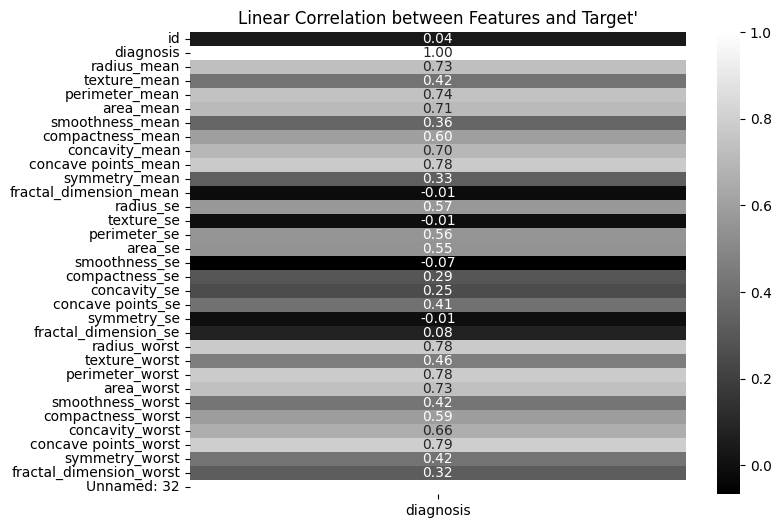

In [295]:
correlation_matrix = df.corr()

correlation_with_diagnosis = correlation_matrix.loc['diagnosis']

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_with_diagnosis.to_frame(), annot=True, fmt='.2f', cmap = 'gist_gray', yticklabels=1)
plt.title("Linear Correlation between Features and Target'")
plt.show()

In [296]:
df = df.drop(df.columns[11:22], axis = 1)

In [297]:
df = df.drop('Unnamed: 32', axis = 1)

df = df.drop('id', axis = 1)

In [298]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

### Check Imbalance

In [299]:
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [300]:
benignant = 357/(357+212)*100
malignant = 100 - benignant
print(f"0 {benignant}")
print(f"1 {malignant}")

0 62.741652021089635
1 37.258347978910365


In [301]:
y = df['diagnosis']
X = df.drop('diagnosis', axis = 1)

In [302]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Train Test Split

In [303]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)

### Checking the distribution of features

smoothness_mean
Median: 0.095955
Mean: 0.09636598591549297
Absolute Difference: 0.0004109859154929757
Difference normalized by the mean: 0.4264844193607742 


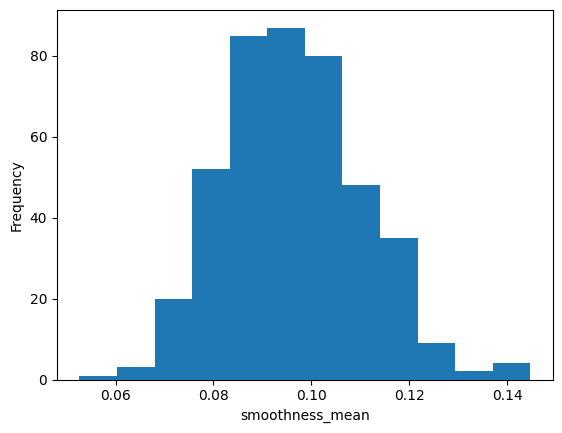

concavity_mean
Median: 0.06168
Mean: 0.0886501307511737
Absolute Difference: 0.0269701307511737
Difference normalized by the mean: 30.423114464291558 


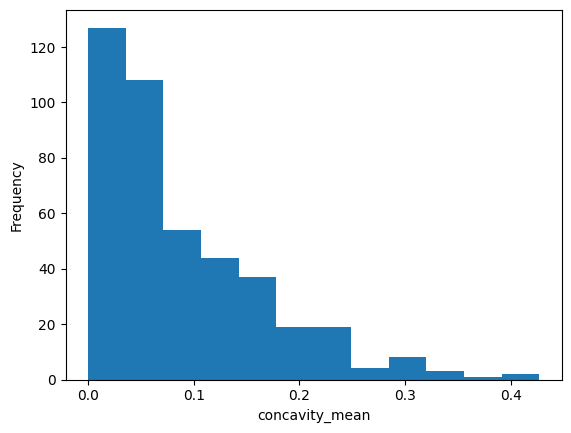

In [304]:
for i in [4, 6]:

    column = X_train.columns[i]

    X_train[column].plot.hist(bins = 12)
    plt.xlabel(column)

    print(column)
    print(f'Median: {np.median(np.array(X_train[column]))}')
    print(f'Mean: {np.mean(np.array(X_train[column]))}')

    absolute_difference = np.absolute(np.median(np.array(X_train[column])) - np.mean(np.array(X_train[column])))
    print(f"Absolute Difference: {absolute_difference}")

    print(f"Difference normalized by the mean: {(absolute_difference/np.mean(np.array(X_train[column]))*100)} ")
    
    plt.show()

### Scalling

In [305]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [306]:
X_scaled = scaler.transform(X)

In [307]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

logreg = LogisticRegression()

logreg.fit(X_train_scaled, y_train)

print(f"Train Score: {logreg.score(X_train_scaled, y_train)}")
print(f"Test Score: {logreg.score(X_test_scaled, y_test)}")


print(f"Cross Validations scores:{cross_val_score(logreg, X_scaled, y, cv=5)}")
print(f"Cross Validation Mean Score: {np.mean(cross_val_score(logreg, X_scaled, y, cv=5))}")

Train Score: 0.9835680751173709
Test Score: 0.965034965034965
Cross Validations scores:[0.97368421 0.98245614 0.97368421 0.96491228 0.99115044]
Cross Validation Mean Score: 0.9771774569166279


In [308]:
from sklearn import tree

classifier = tree.DecisionTreeClassifier()

classifier.fit(X_train_scaled, y_train)

print(f"Train Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Test Score: {classifier.score(X_test_scaled, y_test)}")

print(f"Cross Validations scores:{cross_val_score(classifier, X_scaled, y, cv=5)}")
print(f"Cross Validation Mean Score: {np.mean(cross_val_score(classifier, X_scaled, y, cv=5))}")

Train Score: 1.0
Test Score: 0.9230769230769231
Cross Validations scores:[0.9122807  0.93859649 0.93859649 0.94736842 0.92035398]
Cross Validation Mean Score: 0.9279149200434714


In [309]:
from sklearn import svm

svmachine = svm.SVC(kernel = 'linear')

svmachine.fit(X_train_scaled, y_train)

print(f"Train Score: {svmachine.score(X_train_scaled, y_train)}")
print(f"Test Score: {svmachine.score(X_test_scaled, y_test)}")

print(f"Cross Validations scores:{cross_val_score(svmachine, X_scaled, y, cv=5)}")
print(f"Cross Validation Mean Score: {np.mean(cross_val_score(svmachine, X_scaled, y, cv=5))}")

Train Score: 0.9835680751173709
Test Score: 0.972027972027972
Cross Validations scores:[0.96491228 0.97368421 0.99122807 0.97368421 0.97345133]
Cross Validation Mean Score: 0.9753920198726906


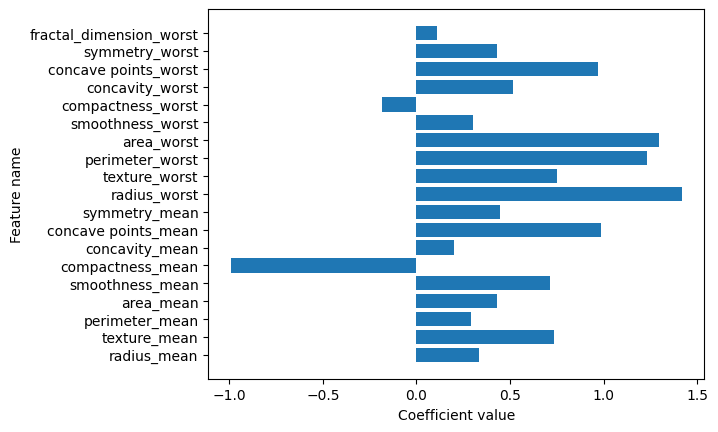

In [310]:
logreg_feature_coefficients(logreg, X_train.columns)

In [311]:
X_train_logreg = X_train.drop(['fractal_dimension_worst', 'compactness_worst', 'concavity_worst', 
                               'perimeter_mean', 'radius_mean'], axis = 1)

X_test_logreg = X_test.drop(['fractal_dimension_worst', 'compactness_worst', 'concavity_worst', 
                             'perimeter_mean', 'radius_mean'], axis = 1)

X_logreg = X.drop(['fractal_dimension_worst', 'compactness_worst', 'concavity_worst', 
                   'perimeter_mean', 'radius_mean'], axis = 1)

In [312]:
scaler = StandardScaler()

X_train_logreg_scaled = scaler.fit_transform(X_train_logreg)
X_test_logreg_scaled = scaler.transform(X_test_logreg)
X_logreg_scaled = scaler.transform(X_logreg)

logreg = LogisticRegression()

logreg.fit(X_train_logreg_scaled, y_train)

print(f"Cross Validations scores:{cross_val_score(logreg, X_logreg_scaled, y, cv=5)}")
print(f"Cross Validation mean score: {np.mean(cross_val_score(logreg, X_logreg_scaled, y, cv=5))}")

Cross Validations scores:[0.98245614 0.98245614 0.98245614 0.96491228 0.99115044]
Cross Validation mean score: 0.9806862288464524


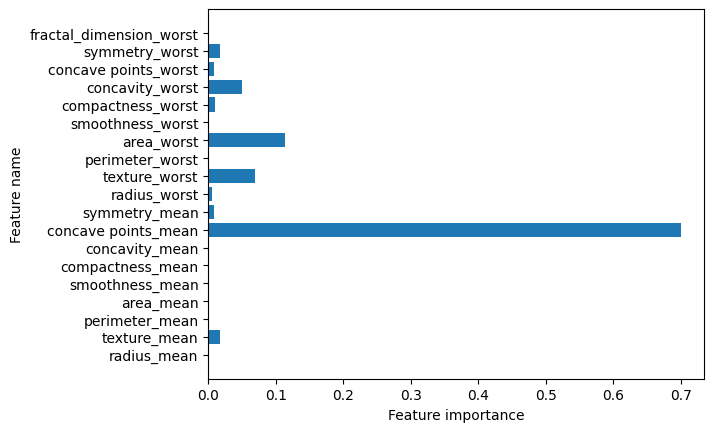

In [313]:
tree_feature_importances(classifier, X_train.columns)

In [314]:
X_train_tree = X_train.drop(['smoothness_mean', 'symmetry_mean', 'concavity_mean', 'area_mean','perimeter_mean','radius_mean'], axis = 1)

X_test_tree = X_test.drop(['smoothness_mean', 'symmetry_mean', 'concavity_mean', 'area_mean','perimeter_mean','radius_mean'], axis = 1)

X_tree = X.drop(['smoothness_mean', 'symmetry_mean', 'concavity_mean', 'area_mean','perimeter_mean','radius_mean'], axis = 1)

In [315]:
classifier = tree.DecisionTreeClassifier()

classifier.fit(X_train_tree, y_train)

print(f"Cross Validations scores:{cross_val_score(classifier, X_tree, y, cv=5)}")
print(f"Cross Validation mean score: {np.mean(cross_val_score(classifier, X_tree, y, cv=5))}")

Cross Validations scores:[0.90350877 0.92105263 0.92982456 0.93859649 0.92035398]
Cross Validation mean score: 0.9279459711224964


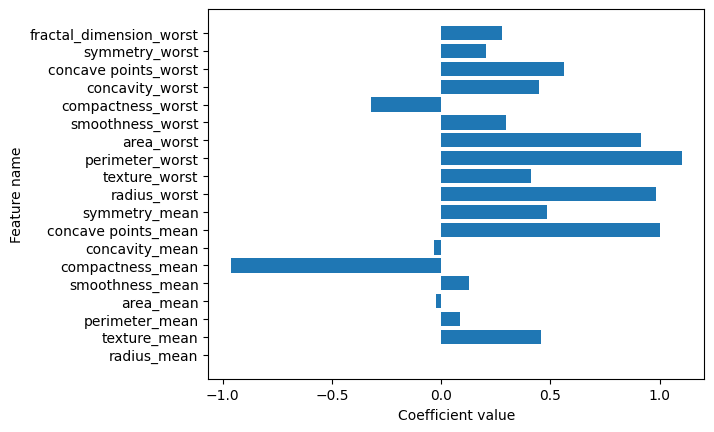

In [316]:
svm_feature_importance(svmachine, X_train.columns)

In [317]:
X_train_svm = X_train.drop(['area_mean', 'concavity_mean', 'radius_mean','perimeter_mean', 'smoothness_mean'], axis = 1)

X_test_svm = X_test.drop(['area_mean', 'concavity_mean', 'radius_mean','perimeter_mean', 'smoothness_mean'], axis = 1)

X_svm = X.drop(['area_mean', 'concavity_mean', 'radius_mean','perimeter_mean', 'smoothness_mean'], axis = 1)

In [318]:
scaler_svm = StandardScaler()

X_train_svm_scaled = scaler_svm.fit_transform(X_train_svm)
X_test_svm_scaled = scaler_svm.transform(X_test_svm)
X_svm_scaled = scaler_svm.transform(X_svm)


svmachine = svm.SVC(kernel = 'linear')

svmachine.fit(X_train_svm_scaled, y_train)

print(f"Train Score: {svmachine.score(X_train_svm_scaled, y_train)}")
print(f"Test Score: {svmachine.score(X_test_svm_scaled, y_test)}")

print(f"Cross Validations scores:{cross_val_score(svmachine, X_svm_scaled, y, cv=5)}")
print(f"Cross Validation Mean Score {np.mean(cross_val_score(svmachine, X_svm_scaled, y, cv=5))}")

Train Score: 0.9835680751173709
Test Score: 0.972027972027972
Cross Validations scores:[0.97368421 0.98245614 0.98245614 0.97368421 0.97345133]
Cross Validation Mean Score 0.9771464058376029


In [319]:
print(f"Non Dropped LogReg Cross Validation Mean Score: {np.mean(cross_val_score(logreg, X_scaled, y, cv=5))}")
print(f"Dropped LogReg Cross Validation mean score: {np.mean(cross_val_score(logreg, X_logreg_scaled, y, cv=5))}")

print(f"Non Dropped Tree Cross Validation Mean Score: {np.mean(cross_val_score(classifier, X_scaled, y, cv=5))}")
print(f"Dropped Tree Cross Validation mean score: {np.mean(cross_val_score(classifier, X_tree, y, cv=5))}")

print(f"Non Dropped SVM Cross Validation Mean Score: {np.mean(cross_val_score(svmachine, X_scaled, y, cv=5))}")
print(f"Dropped SVM Cross Validation Mean Score {np.mean(cross_val_score(svmachine, X_svm_scaled, y, cv=5))}")

Non Dropped LogReg Cross Validation Mean Score: 0.9771774569166279
Dropped LogReg Cross Validation mean score: 0.9806862288464524
Non Dropped Tree Cross Validation Mean Score: 0.9261915851575843
Dropped Tree Cross Validation mean score: 0.927930445582984
Non Dropped SVM Cross Validation Mean Score: 0.9753920198726906
Dropped SVM Cross Validation Mean Score 0.9771464058376029


In [320]:
### We can see that feature importance process makes the CV score slightly better in LogReg and SVM

### Confusion Matrix and derivates

In [331]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(logreg, X_train_logreg_scaled, y_train, cv=5)

confusion = confusion_matrix(y_train, y_train_pred)

print(confusion)

[[262   5]
 [  6 153]]


In [324]:
from sklearn.metrics import precision_score, recall_score

print(f"Precisão: {precision_score(y_train, y_train_pred)}")
print(f"Revocação: {recall_score(y_train, y_train_pred)}")

Precisão: 0.9683544303797469
Revocação: 0.9622641509433962


In [325]:
y_train_predicted_prob

array([1.37100440e-02, 2.39067263e-03, 9.99969576e-01, 6.29036788e-03,
       8.22391414e-01, 3.65310383e-03, 5.31605610e-03, 3.68881567e-03,
       1.04668749e-01, 1.71092560e-01, 3.70244398e-01, 8.79678121e-04,
       9.93207815e-01, 1.80359732e-02, 9.14884588e-01, 5.29492680e-04,
       9.99751195e-01, 9.99993081e-01, 2.33570727e-03, 2.13019892e-02,
       9.95669477e-01, 1.78825419e-03, 9.99692687e-01, 9.09814112e-01,
       9.98791593e-01, 1.31304391e-01, 1.68435727e-02, 1.36103565e-04,
       2.61393307e-03, 6.86595922e-04, 1.29401674e-02, 9.90510156e-01,
       1.66740677e-05, 1.54229352e-04, 1.10073777e-02, 4.51835362e-04,
       8.80895572e-01, 9.99992887e-01, 4.09085467e-02, 2.47853453e-01,
       7.67037098e-01, 4.47440629e-04, 3.15630111e-04, 1.10110726e-01,
       2.27570146e-02, 9.99996220e-01, 7.24479576e-05, 5.56837962e-04,
       9.99643829e-01, 9.96063498e-01, 6.78300129e-04, 1.48213482e-03,
       9.99989702e-01, 9.99999982e-01, 3.51915895e-03, 1.29831992e-02,
      

In [326]:
from sklearn.metrics import precision_recall_curve
y_train_predicted_prob = cross_val_predict(logreg, X_train_logreg_scaled, y_train, cv=5, method='predict_proba')
y_train_predicted_prob = y_train_predicted_prob[:,1]
precision, recall, thresholds = precision_recall_curve(y_train, y_train_predicted_prob)

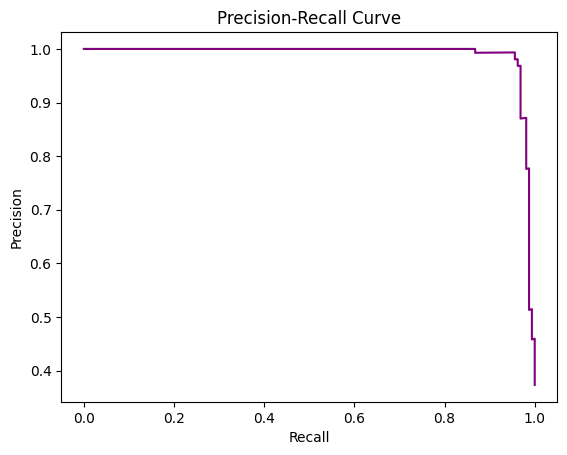

In [327]:
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

plt.show()


In [328]:
adjust_threshold(recall, precision, recall_value = 0.985)

224
0.9874213836477987
0.7772277227722773
0.08015445231721813


In [329]:
final_threshold = thresholds[final_index]

y_final_predict = np.where(y_train_predicted_prob > final_threshold, 1, 0)

In [330]:
print(confusion_matrix(y_train, y_final_predict))

[[222  45]
 [  3 156]]
